## 課題2-5 回答例

In [1]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SampleData.csv')  #csvデータをDataFrameへ読み込み
df

,Year,T_Tokyo,Pr_Tokyo,MaxHourPr_Tokyo,T_Maebashi,Pr_Maebashi,MaxHourPr_Maebashi
0,1951,14.7,1589.8,64.4,13.5,1139.1,35.1
1,1952,14.6,1640.6,30.9,13.4,1164.1,19.1
2,1953,14.6,1519.4,33.8,13.3,1274.6,20.3
3,1954,14.8,1770.7,34.8,13.6,1275.3,47.3
4,1955,15.5,1553.9,34.7,14.2,1776.6,94.0
...,...,...,...,...,...,...,...
65,2016,16.4,1779.0,47.5,15.6,1249.0,38.5
66,2017,15.8,1430.0,22.5,14.9,1192.5,38.5
67,2018,16.8,1445.5,38.5,16.1,1046.5,47.5
68,2019,16.5,1874.0,36.5,15.7,1447.5,49.0


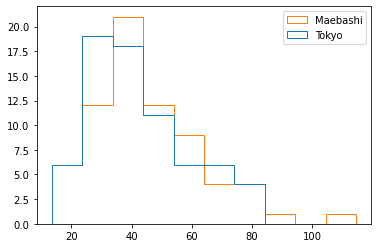

In [3]:
x= df['MaxHourPr_Tokyo'].values  #DataFrameの指定列を1次元numpy配列xに変換
y= df['MaxHourPr_Maebashi'].values

plt.hist([x,y], histtype='step',label=['Tokyo','Maebashi'])
plt.legend(loc='upper right')

N1=len(x)
N2=len(y)

In [4]:
#統計量S2xyの実現値
s2xy=0 
for i in range(N1):
    s2xy += (x[i]-np.mean(x))**2
for i in range(N2):
    s2xy += (y[i]-np.mean(y))**2
s2xy /= N1+N2-2

In [5]:
#統計量Tの実現値
tau= (np.mean(x)-np.mean(y))/((1/N1+1/N2)*s2xy)**0.5
tau

-1.03239416740944

In [6]:
## t分布の数値積分によるp値の算出
v= N1+N2-2 # t分布の自由度
k= 1/(v*math.pi)**0.5*math.gamma((v+1)/2)/math.gamma(v/2) #規格化定数の厳密な式

#積分区間
a= -25 #下限
b= 25 # 上限

ndiv= 100000; #分割区間数
if tau >= 0:
    high= b
    low= tau
else:
    high= tau
    low= a
dt= (high-low)/ndiv

sum= 0
t= low
for i in range(ndiv):
    sum += k*(1+t**2/v)**(-(v+1)/2)*dt  # 短冊の和。
    t += dt  # x座標の更新
p=sum #片側検定なのでそのまま
print("p val = {:.4e}".format(p))

p val = 1.5182e-01
